In [2]:
# # ignore if not running on google colab
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.insert(0,'/content/drive/My Drive/182 project')

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seq_data as seq
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import utils

# set seed to ensure reproducibility
torch.manual_seed(101)

# Dataset Preperation

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
target = ['SOC', 'Tc']
features = list(df_train.columns.difference(target))

# Define training and testing loop function

In [5]:
torch.manual_seed(101)
# Number of features used as input. (Number of columns)
NUM_FEATURES = 5
# Number of previous time stamps taken into account.
SEQ_LENGTH = 10
# number of past timestep the current step can consider
HIDDEN_SIZE = 10

# Number of stacked rnn layers.
NUM_LAYERS = 2

BATCH_SIZE = 1

EPOCH = 100

learning_rate = 1e-3
loss_function = nn.MSELoss()

train_dataset = seq.SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=SEQ_LENGTH
)
test_dataset = seq.SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=SEQ_LENGTH
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# SOC and TC Forecasting Experiment

In [6]:
import SOC_RNN

Vanilla RNN

In [7]:


torch.manual_seed(101)
model = SOC_RNN.SOCRNN(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 2, num_layers = 1)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

epoch_loss_train_VRNN = []
epoch_loss_test_VRNN = []
for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_VRNN.append(train_loss)
    epoch_loss_test_VRNN.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.33578345638467

Epoch 0
---------
Train loss: 0.013702937322275528
Test loss: 0.5625646998242094

Epoch 10
---------
Train loss: 0.00015804307130560353
Test loss: 0.8506138565278798

Epoch 20
---------
Train loss: 2.1444355672496575e-05
Test loss: 0.13975682835483433

Epoch 30
---------
Train loss: 1.6919514436028212e-05
Test loss: 0.17653712008629355

Epoch 40
---------
Train loss: 3.0863649818200805e-06
Test loss: 0.3019416682219685

Epoch 50
---------
Train loss: 3.103232703712895e-06
Test loss: 0.17282804131443869

Epoch 60
---------
Train loss: 1.6513432272271837e-06
Test loss: 0.12026340511673737

Epoch 70
---------
Train loss: 1.3877537110383515e-06
Test loss: 0.1105727274309217

Epoch 80
---------
Train loss: 1.2293488667406654e-06
Test loss: 0.10915214602332476

Epoch 90
---------
Train loss: 8.977546750233277e-07
Test loss: 0.11521838869393881



Vertically stacked RNN

In [8]:

torch.manual_seed(101)
model = SOC_RNN.SOCRNN(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 2,num_layers = NUM_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

epoch_loss_train_SRNN = []
epoch_loss_test_SRNN = []
for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_SRNN.append(train_loss)
    epoch_loss_test_SRNN.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.2580243212240748

Epoch 0
---------
Train loss: 0.0046184347887419505
Test loss: 0.42954296644821055

Epoch 10
---------
Train loss: 0.000346486600037759
Test loss: 0.6174768043541917

Epoch 20
---------
Train loss: 0.00023366379782139397
Test loss: 0.19947842700521845

Epoch 30
---------
Train loss: 6.731179820005777e-05
Test loss: 0.18533979778444518

Epoch 40
---------
Train loss: 0.00022955143760469284
Test loss: 1.2586516911810963

Epoch 50
---------
Train loss: 5.568545480209563e-06
Test loss: 0.6294864697539708

Epoch 60
---------
Train loss: 5.020679545025e-05
Test loss: 0.5249008985407277

Epoch 70
---------
Train loss: 6.470409043679675e-05
Test loss: 1.5265190631112215

Epoch 80
---------
Train loss: 8.91296102629537e-05
Test loss: 0.5546869169751357

Epoch 90
---------
Train loss: 2.601052663382866e-05
Test loss: 3.889708537066479



Vannila LSTM

In [9]:
import SOC_LSTM
torch.manual_seed(101)
model = SOC_LSTM.SOCLSTM(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 2,num_layers = 1)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch_loss_train_VLSTM = []
epoch_loss_test_VLSTM = []

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_VLSTM.append(train_loss)
    epoch_loss_test_VLSTM.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.4322246731864288

Epoch 0
---------
Train loss: 0.011177068255228012
Test loss: 0.6311113710054808

Epoch 10
---------
Train loss: 1.5216309231142452e-05
Test loss: 0.11411131229803231

Epoch 20
---------
Train loss: 5.6046675787033014e-06
Test loss: 0.1389190326258354

Epoch 30
---------
Train loss: 1.990450899286849e-06
Test loss: 0.12443318808710863

Epoch 40
---------
Train loss: 1.2371381291645625e-06
Test loss: 0.11560054036216216

Epoch 50
---------
Train loss: 6.358858605824893e-07
Test loss: 0.10769060673610469

Epoch 60
---------
Train loss: 7.554487106222931e-07
Test loss: 0.09962488657702544

Epoch 70
---------
Train loss: 9.457185411071761e-07
Test loss: 0.0963020451952319

Epoch 80
---------
Train loss: 7.453310334800393e-07
Test loss: 0.09434642124189757

Epoch 90
---------
Train loss: 6.708110899338338e-07
Test loss: 0.09471006743461316



Vertically stacked LSTM

In [10]:
"""train and test LSTM"""

torch.manual_seed(101)
model = SOC_LSTM.SOCLSTM(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 2, num_layers = NUM_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch_loss_train_SLSTM = []
epoch_loss_test_SLSTM = []

print("Untrained test\n--------")

utils.test(test_loader, model, loss_function, 0)
print()

for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_SLSTM.append(train_loss)
    epoch_loss_test_SLSTM.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.5457741349935532

Epoch 0
---------
Train loss: 0.01071907710755348
Test loss: 0.22419023757487763

Epoch 10
---------
Train loss: 1.764467325031266e-05
Test loss: 0.04092330211342464

Epoch 20
---------
Train loss: 4.015770026683735e-06
Test loss: 0.040951496854108885

Epoch 30
---------
Train loss: 6.313685280853335e-06
Test loss: 0.0526035776063825

Epoch 40
---------
Train loss: 2.486161594407488e-06
Test loss: 0.04772557707724502

Epoch 50
---------
Train loss: 2.3305901620060655e-06
Test loss: 0.028028649774064444

Epoch 60
---------
Train loss: 2.45715078359393e-06
Test loss: 0.028304011076584618

Epoch 70
---------
Train loss: 2.3065985590900413e-06
Test loss: 0.02693228734313049

Epoch 80
---------
Train loss: 2.49301890606061e-06
Test loss: 0.029273473871002337

Epoch 90
---------
Train loss: 3.126632885139059e-06
Test loss: 0.03347098126788046



Loss Over Epoch Visualization

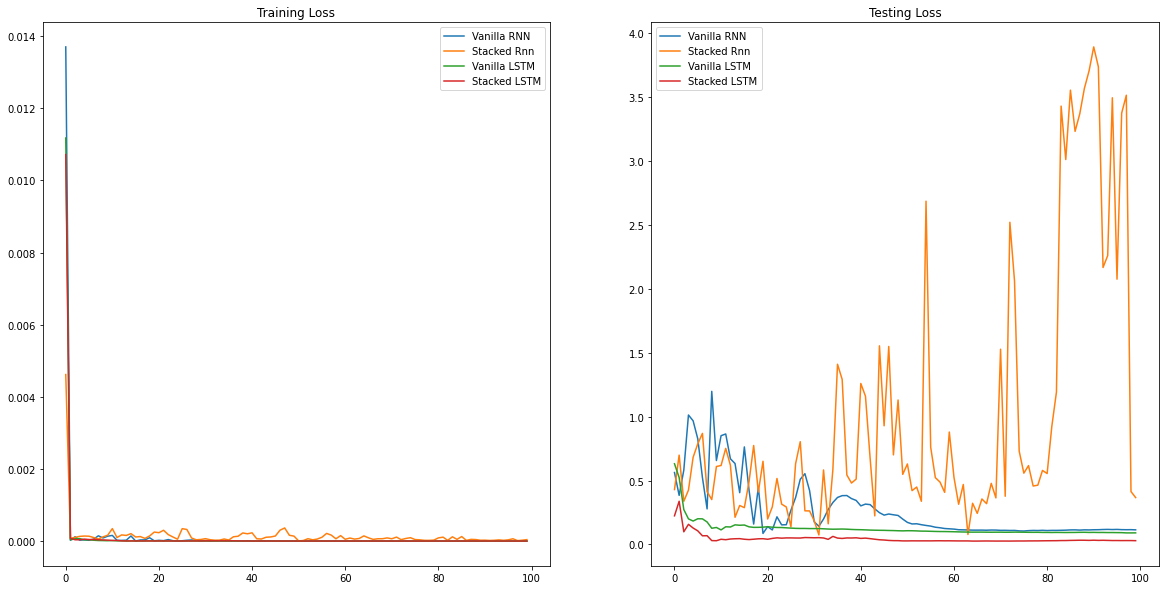

In [11]:
fig1 = plt.figure(figsize=(20, 10))
ax0 = fig1.add_subplot(121, title="Training Loss")
ax1 = fig1.add_subplot(122, title="Testing Loss")


epoch = range(EPOCH)
ax0.plot(epoch, epoch_loss_train_VRNN, label='Vanilla RNN')
ax0.plot(epoch, epoch_loss_train_SRNN, label='Stacked Rnn')
ax0.plot(epoch, epoch_loss_train_VLSTM, label='Vanilla LSTM')
ax0.plot(epoch, epoch_loss_train_SLSTM, label='Stacked LSTM')
ax1.plot(epoch, epoch_loss_test_VRNN, label='Vanilla RNN')
ax1.plot(epoch, epoch_loss_test_SRNN, label='Stacked Rnn')
ax1.plot(epoch, epoch_loss_test_VLSTM, label='Vanilla LSTM')
ax1.plot(epoch, epoch_loss_test_SLSTM, label='Stacked LSTM')

ax0.legend()
ax1.legend()

In [12]:
fig1.savefig = ("loss_over_epoch_with_Tc")

In [13]:
VRNN_min_loss =  min(epoch_loss_train_VRNN)
SRNN_min_loss = min(epoch_loss_train_SRNN)
VLSTM_min_loss = min(epoch_loss_train_VLSTM)
SLSTM_min_loss = min(epoch_loss_train_SLSTM)
VRNN_min_loss = min(epoch_loss_test_VRNN)
SRNN_min_loss = min(epoch_loss_test_SRNN)
VLSTM_min_loss = min(epoch_loss_test_VLSTM)
SLSTM_min_loss = min(epoch_loss_test_SLSTM)

In [16]:
print('VRNN_min_loss:', VRNN_min_loss) 
print('SRNN_min_loss:', SRNN_min_loss) 
print('VLSTM_min_loss:', VLSTM_min_loss)
print('SLSTM_min_loss:', SLSTM_min_loss)

VRNN_min_loss 0.08660135635044366
SRNN_min_loss 0.07459201521445948
VLSTM_min_loss 0.09065811633632875
SLSTM_min_loss 0.026628278411583554
VRNN_min_los 0.08660135635044366
SRNN_min_loss 0.07459201521445948
VLSTM_min_loss 0.09065811633632875
SLSTM_min_loss 0.026628278411583554


# Experiment without the Tc Feature

# Dataset preparation

In [17]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train[['V', 'I', 'Tc', 'prev_SOC' ,'SOC']]
df_test = df_test[['V', 'I', 'Tc', 'prev_SOC' ,'SOC']]
target = ['SOC']
features = list(df_train.columns.difference(target))

hyperparameter setting

In [18]:
torch.manual_seed(101)
# Number of features used as input. (Number of columns)
NUM_FEATURES = 4
# Number of previous time stamps taken into account.
SEQ_LENGTH = 10
# number of past timestep the current step can consider
HIDDEN_SIZE = 10
# Number of stacked rnn layers.
NUM_LAYERS = 2
# We have total of 20 rows in our input. 
# We divide the input into 4 batches where each batch has only 1
# row. Each row corresponds to a sequence of length 5. 
BATCH_SIZE = 1

train_dataset = seq.SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=SEQ_LENGTH
)
test_dataset = seq.SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=SEQ_LENGTH
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Vanilla RNN

In [19]:

torch.manual_seed(101)
model = SOC_RNN.SOCRNN(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 1, num_layers = 1)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

epoch_loss_train_VRNN_2 = []
epoch_loss_test_VRNN_2 = []
for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_VRNN_2.append(train_loss)
    epoch_loss_test_VRNN_2.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.5616187701188028

Epoch 0
---------
Train loss: 0.0023849834907571873
Test loss: 0.08401099272296132

Epoch 10
---------
Train loss: 8.48444804696309e-06
Test loss: 0.016279018565048323

Epoch 20
---------
Train loss: 5.772556864942697e-06
Test loss: 0.003994260487386265

Epoch 30
---------
Train loss: 4.285218496990145e-06
Test loss: 0.003202113261530928

Epoch 40
---------
Train loss: 7.024356620075219e-06
Test loss: 0.005777793779520626

Epoch 50
---------
Train loss: 6.613768763254955e-06
Test loss: 0.10273810409330476

Epoch 60
---------
Train loss: 7.481625791128968e-06
Test loss: 0.15757494722586715

Epoch 70
---------
Train loss: 4.4656794518943384e-06
Test loss: 0.17080937145956684

Epoch 80
---------
Train loss: 3.1729658945656305e-06
Test loss: 0.18819692832904167

Epoch 90
---------
Train loss: 2.4818442996276874e-06
Test loss: 0.13924214603114127



Vertically Stacked RNN

In [20]:

torch.manual_seed(101)
model = SOC_RNN.SOCRNN(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE,target_size = 1, num_layers = NUM_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

epoch_loss_train_SRNN_2 = []
epoch_loss_test_SRNN_2 = []
for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_SRNN_2.append(train_loss)
    epoch_loss_test_SRNN_2.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.4547515600919724

Epoch 0
---------
Train loss: 0.0012033676243137649
Test loss: 0.027135025877189634

Epoch 10
---------
Train loss: 5.682362454450545e-06
Test loss: 0.009486663922199776

Epoch 20
---------
Train loss: 2.8497441053914866e-06
Test loss: 0.009464222917752474

Epoch 30
---------
Train loss: 2.7132634659347198e-06
Test loss: 0.010341619577617953

Epoch 40
---------
Train loss: 1.223854126745762e-05
Test loss: 0.009888830144054703

Epoch 50
---------
Train loss: 1.8553704416373327e-06
Test loss: 0.012331652375129789

Epoch 60
---------
Train loss: 1.699227541081012e-06
Test loss: 0.011024344301573633

Epoch 70
---------
Train loss: 1.7878588901594326e-06
Test loss: 0.011130261279499322

Epoch 80
---------
Train loss: 2.7940077991380997e-06
Test loss: 0.010344408368420875

Epoch 90
---------
Train loss: 2.1684720687220833e-06
Test loss: 0.010196413335756471



Vanilla LSTM

In [21]:

torch.manual_seed(101)
model = SOC_LSTM.SOCLSTM(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 1, num_layers = 1)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch_loss_train_VLSTM_2 = []
epoch_loss_test_VLSTM_2 = []

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

for i in range(EPOCH):
    if i % 10 ==0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_VLSTM_2.append(train_loss)
    epoch_loss_test_VLSTM_2.append(test_loss)
    if i % 10 ==0:
        print()

Untrained test
--------
Test loss: 0.2137629382777959

Epoch 0
---------
Train loss: 0.001163074131153041
Test loss: 0.014555986431712995

Epoch 10
---------
Train loss: 1.9629539859580722e-07
Test loss: 0.018571151818181992

Epoch 20
---------
Train loss: 7.504622495603337e-07
Test loss: 0.02334108548107838

Epoch 30
---------
Train loss: 2.379758815737452e-07
Test loss: 0.028185259324935128

Epoch 40
---------
Train loss: 3.2872617650954575e-07
Test loss: 0.028678025674103057

Epoch 50
---------
Train loss: 2.1815762157065313e-07
Test loss: 0.02560556549230629

Epoch 60
---------
Train loss: 1.710687132300672e-07
Test loss: 0.01489718342970071

Epoch 70
---------
Train loss: 1.7017439282854716e-07
Test loss: 0.006213807638515243

Epoch 80
---------
Train loss: 1.396814294245786e-07
Test loss: 0.002991577810534689

Epoch 90
---------
Train loss: 1.337614169657915e-07
Test loss: 0.005940747696186259



Vertically Stacked LSTM

In [22]:
"""train and test LSTM"""
torch.manual_seed(101)
model = SOC_LSTM.SOCLSTM(num_features=NUM_FEATURES, hidden_size=HIDDEN_SIZE, target_size = 1, num_layers = NUM_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch_loss_train_SLSTM_2 = []
epoch_loss_test_SLSTM_2 = []

print("Untrained test\n--------")
utils.test(test_loader, model, loss_function, 0)
print()

for i in range(EPOCH):
    if i % 10 == 0:
        print(f"Epoch {i}\n---------")
    train_loss = utils.train(train_loader, model, loss_function, optimizer, i)
    test_loss = utils.test(test_loader, model, loss_function, i)
    epoch_loss_train_SLSTM_2.append(train_loss)
    epoch_loss_test_SLSTM_2.append(test_loss)
    if i % 10 == 0:
        print()

Untrained test
--------
Test loss: 0.23538743710145354

Epoch 0
---------
Train loss: 0.001113063896762398
Test loss: 0.005154708645420867

Epoch 10
---------
Train loss: 1.8425454521522792e-06
Test loss: 0.010751363827817252

Epoch 20
---------
Train loss: 2.8997651439314233e-06
Test loss: 0.01987769401193553

Epoch 30
---------
Train loss: 1.0483772192083134e-06
Test loss: 0.013127858890653599

Epoch 40
---------
Train loss: 6.23922143808907e-07
Test loss: 0.01508297935350892

Epoch 50
---------
Train loss: 6.907099121016961e-07
Test loss: 0.015670137333923098

Epoch 60
---------
Train loss: 5.013951633794562e-07
Test loss: 0.01288976274010115

Epoch 70
---------
Train loss: 4.314839953853689e-07
Test loss: 0.012992903365909214

Epoch 80
---------
Train loss: 5.624862832700936e-07
Test loss: 0.01437761317224388

Epoch 90
---------
Train loss: 7.656607441822932e-07
Test loss: 0.012507304188123555



Loss Over Epoch Visualization

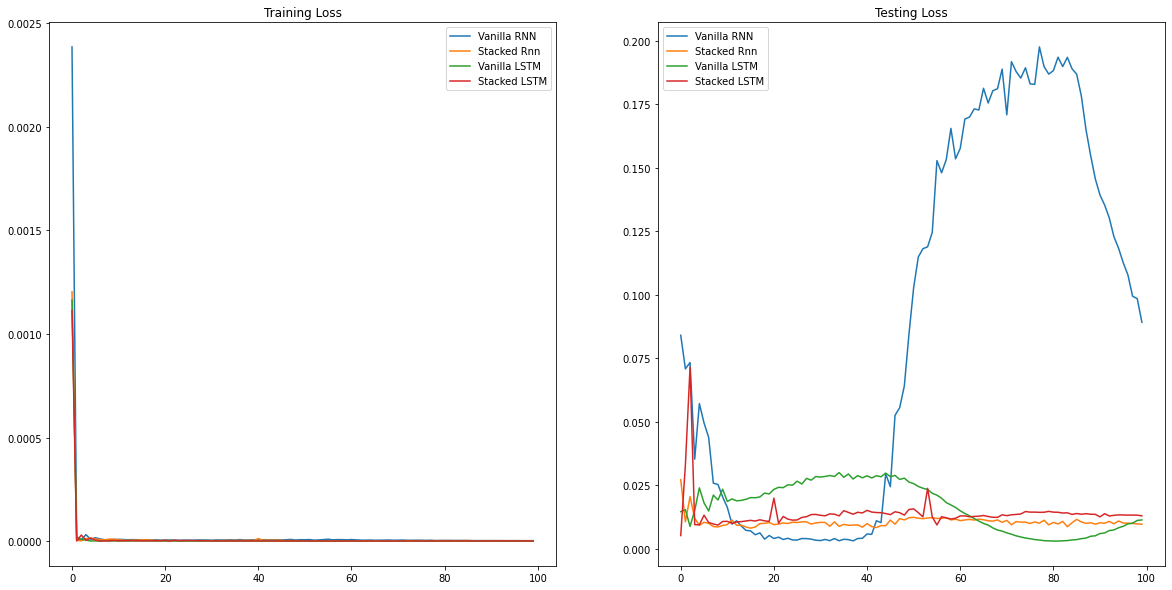

In [23]:
fig2 = plt.figure(figsize=(20, 10))
ax0 = fig2.add_subplot(121, title="Training Loss")
ax1 = fig2.add_subplot(122, title="Testing Loss")


epoch = range(EPOCH)
ax0.plot(epoch, epoch_loss_train_VRNN_2, label='Vanilla RNN')
ax0.plot(epoch, epoch_loss_train_SRNN_2, label='Stacked Rnn')
ax0.plot(epoch, epoch_loss_train_VLSTM_2, label='Vanilla LSTM')
ax0.plot(epoch, epoch_loss_train_SLSTM_2, label='Stacked LSTM')
ax1.plot(epoch, epoch_loss_test_VRNN_2, label='Vanilla RNN')
ax1.plot(epoch, epoch_loss_test_SRNN_2, label='Stacked Rnn')
ax1.plot(epoch, epoch_loss_test_VLSTM_2, label='Vanilla LSTM')
ax1.plot(epoch, epoch_loss_test_SLSTM_2, label='Stacked LSTM')

ax0.legend()
ax1.legend()

In [24]:
fig2.savefig = ("loss_over_epoch_without_Tc")

In [25]:
VRNN_min_loss_2 =  min(epoch_loss_train_VRNN_2)
SRNN_min_loss_2 = min(epoch_loss_train_SRNN_2)
VLSTM_min_loss_2 = min(epoch_loss_train_VLSTM_2)
SLSTM_min_loss_2 = min(epoch_loss_train_SLSTM_2)

In [26]:
print('VRNN_min_loss:', VRNN_min_loss_2) 
print('SRNN_min_loss:', SRNN_min_loss_2) 
print('VLSTM_min_loss:', VLSTM_min_loss_2)
print('SLSTM_min_loss:', SLSTM_min_loss_2)

VRNN_min_loss: 0.0030706007673662857
SRNN_min_loss: 0.008086594020335352
VLSTM_min_loss: 0.0029796078785126936
SLSTM_min_loss: 0.005154708645420867
VRNN_min_loss: 0.0030706007673662857
SRNN_min_loss: 0.008086594020335352
VLSTM_min_loss: 0.0029796078785126936
SLSTM_min_loss: 0.005154708645420867
